# Real Estate Price Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("bengaluru_house_prices.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory Data Analysis

In [3]:
data = data[['location','size','total_sqft','price','bath']]
data.head()

,location,size,total_sqft,price,bath
0,Electronic City Phase II,2 BHK,1056,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0
2,Uttarahalli,3 BHK,1440,62.00,2.0
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0
4,Kothanur,2 BHK,1200,51.00,2.0


In [4]:
data.shape

(13320, 5)

In [5]:
data.isnull().sum()

location       1
size          16
total_sqft     0
price          0
bath          73
dtype: int64

In [6]:
data = data.dropna()
data.head()

,location,size,total_sqft,price,bath
0,Electronic City Phase II,2 BHK,1056,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0
2,Uttarahalli,3 BHK,1440,62.00,2.0
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0
4,Kothanur,2 BHK,1200,51.00,2.0


In [7]:
data.shape

(13246, 5)

In [8]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(" ")[0]))
data.head()

,location,size,total_sqft,price,bath,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0,4
2,Uttarahalli,3 BHK,1440,62.00,2.0,3
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0,3
4,Kothanur,2 BHK,1200,51.00,2.0,2


In [9]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
data[~data['total_sqft'].apply(is_float)]

,location,size,total_sqft,price,bath,bhk
30,Yelahanka,4 BHK,2100 - 2850,186.000,4.0,4
122,Hebbal,4 BHK,3067 - 8156,477.000,4.0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,54.005,2.0,2
165,Sarjapur,2 BHK,1145 - 1340,43.490,2.0,2
188,KR Puram,2 BHK,1015 - 1540,56.800,2.0,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,38.190,2.0,2
12990,Talaghattapura,3 BHK,1804 - 2273,122.000,3.0,3
13059,Harlur,2 BHK,1200 - 1470,72.760,2.0,2
13265,Hoodi,2 BHK,1133 - 1384,59.135,2.0,2


In [12]:
def convert_sqft_to_num(x):
    Split_Tokens = x.split("-")
    if len(Split_Tokens) == 2:
        return (float(Split_Tokens[0])+float(Split_Tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
data.head()

,location,size,total_sqft,price,bath,bhk
0,Electronic City Phase II,2 BHK,1056,39.07,2.0,2
1,Chikka Tirupathi,4 Bedroom,2600,120.00,5.0,4
2,Uttarahalli,3 BHK,1440,62.00,2.0,3
3,Lingadheeranahalli,3 BHK,1521,95.00,3.0,3
4,Kothanur,2 BHK,1200,51.00,2.0,2


In [14]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

In [15]:
data.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
price          477.0
bath             4.0
bhk                4
Name: 122, dtype: object

In [16]:
data["price_per_sqft"] = data['price'] * 100000/data["total_sqft"]
data.head()

,location,size,total_sqft,price,bath,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2.0,2,4250.000000


In [17]:
data['location'] = data['location'].apply(lambda x: x.strip())

# Removing Outliers

In [18]:
location_stats = data['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [19]:
location_stats.values.sum()

13246

In [20]:
len(location_stats[location_stats>10])

241

In [21]:
len(location_stats)

1293

In [22]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [23]:
data['location'] = data['location'].apply(lambda x : "other" if x in location_stats_less_than_10 else x )
data.head()

,location,size,total_sqft,price,bath,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,39.07,2.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,120.00,5.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,62.00,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,95.00,3.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,51.00,2.0,2,4250.000000


In [24]:
data[data.total_sqft/data.bhk < 300]

,location,size,total_sqft,price,bath,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,370.0,6.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,200.0,9.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,150.0,4.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,85.0,7.0,8,6296.296296
70,other,3 Bedroom,500.0,100.0,3.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,218.0,7.0,7,15571.428571
13279,other,6 Bedroom,1200.0,130.0,5.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,125.0,5.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,70.0,5.0,5,9043.927649


In [25]:
data.shape

(13246, 7)

In [26]:
data = data[~(data.total_sqft/data.bhk < 300)]

In [27]:
data.shape

(12502, 7)

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)
data.shape

(10241, 7)

# Data Visualization 

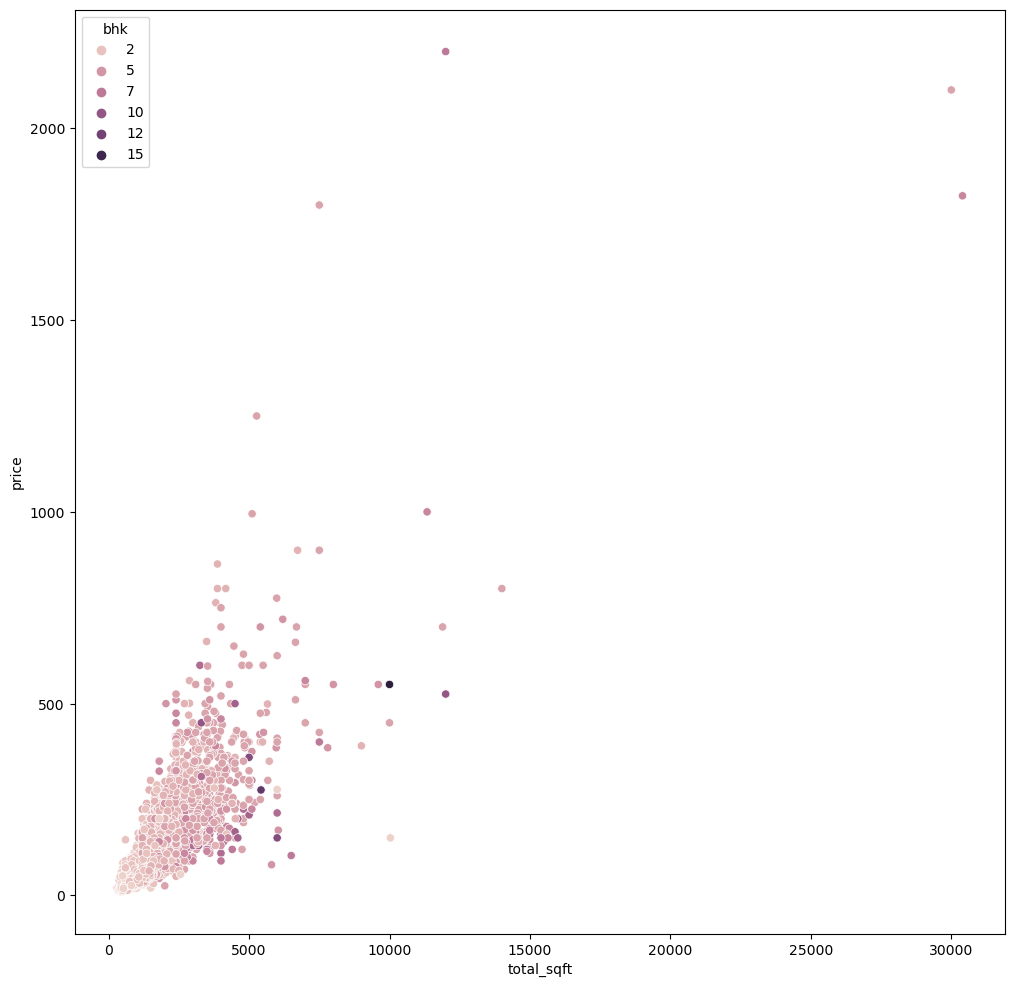

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(data = data,x = data.total_sqft,y = data.price,hue = data.bhk)
plt.show()

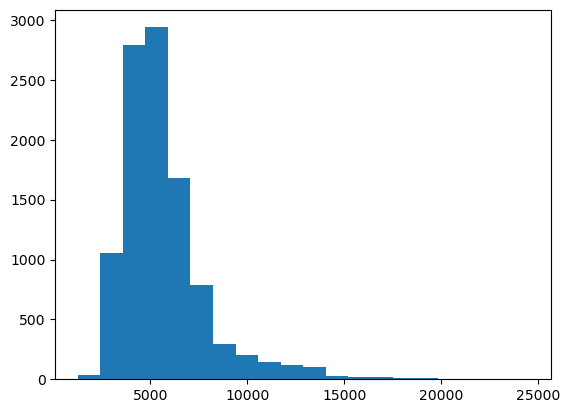

In [30]:
plt.hist(data.price_per_sqft,bins = 20,histtype = 'bar')
plt.show()

In [31]:
data = data[data.bath<data.bhk+2]
data.shape

(10147, 7)

In [32]:
data.columns

Index(['location', 'size', 'total_sqft', 'price', 'bath', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [33]:
data = data.drop(['size','price_per_sqft'],axis='columns')
data.head(3)

,location,total_sqft,price,bath,bhk
0,1st Block Jayanagar,2850.0,428.0,4.0,4
1,1st Block Jayanagar,1630.0,194.0,3.0,3
2,1st Block Jayanagar,1875.0,235.0,2.0,3


In [34]:
dummies = pd.get_dummies(data.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,total_sqft,price,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,428.0,4.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,194.0,3.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,235.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,130.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,148.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data = data.drop('location',axis='columns')
data.head(2)

,total_sqft,price,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,428.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the Dataset into Features and Target Variable

In [37]:
X = data.drop(['price'],axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Y = data['price']
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=44)

# Model Building And Evaluation

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

# Prediction

In [41]:
y_pred = LR.predict(X_test)

In [42]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return LR.predict([x])[0]

In [43]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

100.06699842053968

In [44]:
predict_price('Indira Nagar',1000, 2, 2)

182.64389270755868

In [45]:
predict_price('Indira Nagar',1000, 3, 3)

186.1752575553846